닮은꼴 찾기
=======

##  1. 얼굴임베딩 만들기(1) 얼굴인식
    
### 데이터 준비 

file_list: ['clinton.jpeg', 'trump.jpg', 'bush.jpeg', 'biden.jpg', 'reagan.jpg', 'obama.jpg']


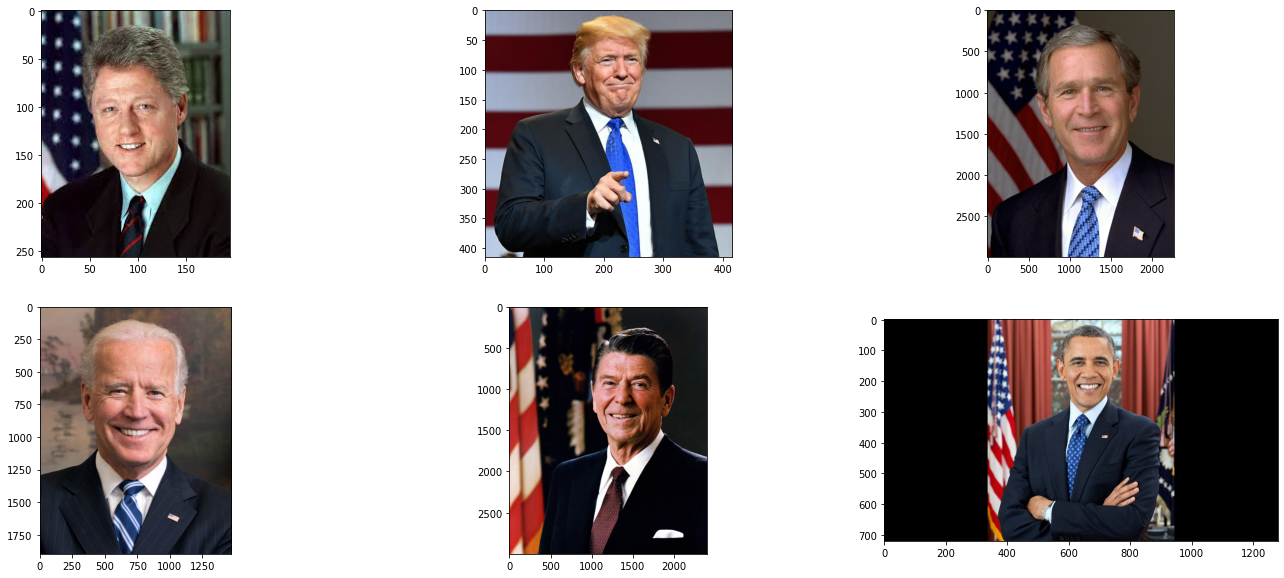

In [1]:
import os

dir_path = os.getenv('HOME')+'/aiffel/Exploration/E5/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

# 샘플이미지들을 matplotlib로 확인
import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

[(98, 758, 284, 572)]


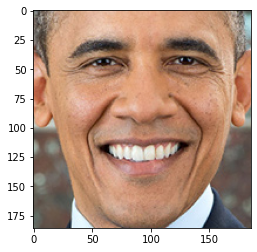

In [2]:
# 샘플 이미지의 obama.jpg를 불러온 후 얼굴을 face_recognition.face_locations를 사용해 찾아줍니다. 
import face_recognition
import os
import matplotlib.pyplot as plt
%matplotlib inline

image_path = os.getenv('HOME')+'/aiffel/Exploration/E5/face_embedding/images/obama.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

- https://face-recognition.readthedocs.io/en/latest/face_recognition.html   

- 얼굴 박스를 찾게 되면 임베딩 추출을 할 이미지를 만들기 위해서 잘라줍니다. 

In [3]:
# 이미지 파일 경로를 파라미터로 넘기면 얼굴 영역만 잘라서 주는 함수
import face_recognition
import os

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

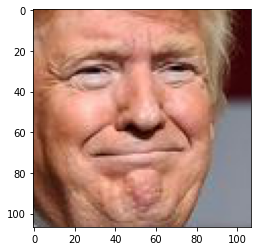

In [4]:
# 함수가 잘 만들어 졌는지 트럼프 이미지로 확인
image_path = os.getenv('HOME')+'/aiffel/Exploration/E5/face_embedding/images/trump.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

## 2. 얼굴임베딩 만들기(2) FaceNet

얼굴 영역을 인식하는 데 사용했던 Face Recognition에는 바로 위에 소개한 FaceNet 얼굴 임베딩 모델이 탑재되어 있습니다. 이 모델을 이용하여 우리가 다운로드해 둔 6장의 이미지에서 얼굴 임베딩을 추출해 봅시다.
    
Face Recognition 패키지에서 제공하는 얼굴 임베딩 벡터를 구하는 함수는 face_recognition.face_encodings()

In [6]:
# 파일 리스트 확인 
import os

dir_path = os.getenv('HOME')+'/aiffel/Exploration/E5/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['clinton.jpeg', 'trump.jpg', 'bush.jpeg', 'biden.jpg', 'reagan.jpg', 'obama.jpg']


In [7]:
#  obama.jpg에 포함된 얼굴 영역의 임베딩 벡터를 구해 보기
image_file = os.path.join(dir_path, 'obama.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.08126248,  0.11014761, -0.01082448, -0.05268792,  0.01033717,
        -0.00813808, -0.07251769, -0.0922646 ,  0.19304723, -0.09246384,
         0.23908533,  0.06770287, -0.22123125, -0.14119367,  0.05562152,
         0.13705511, -0.17924425, -0.07232306, -0.11183281, -0.11370818,
         0.03956435, -0.01019115,  0.0942178 ,  0.04493114, -0.12757549,
        -0.34449592, -0.05374938, -0.17703305,  0.00868226, -0.09721592,
        -0.09817187,  0.00278232, -0.17721367, -0.12789807,  0.03489833,
        -0.01991234, -0.00838933, -0.00132862,  0.18308581,  0.02447568,
        -0.1237656 ,  0.09957044,  0.02323568,  0.22983313,  0.2838524 ,
         0.06655717, -0.00558912, -0.09833544,  0.10058986, -0.23476946,
         0.06006292,  0.1341591 ,  0.08373027,  0.03900504,  0.10194533,
        -0.19337648,  0.01717628,  0.08978969, -0.16005114,  0.01892098,
         0.03082444, -0.06051281, -0.04526773,  0.04633342,  0.20678686,
         0.10299795, -0.12437531, -0.0490516 ,  0.1

- Face_recognition 패키지에서 제공하는 얼굴 임베딩 벡터의 차원수는 128차원으로 FaceNet 논문에서 언급한 얼굴 임베딩 벡터의 차원수와 같다. 

In [8]:
# images 디렉토리 안에 모든 이미지 파일의 임베딩을 구해서 dict 구조에 담아 리턴하는 함수
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [9]:
# embedding_dict 확인
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['trump']

array([-0.15962467,  0.20268655,  0.0323635 ,  0.02439232, -0.06226439,
        0.05140705,  0.07351795, -0.16823348,  0.06962204, -0.05557961,
        0.17270109, -0.05094168, -0.35293093, -0.0316438 ,  0.03792984,
        0.17343847, -0.13260126, -0.15357377, -0.23523533, -0.08442692,
       -0.00134139,  0.03210667, -0.08926154, -0.02670781, -0.09581181,
       -0.25792354, -0.01056999, -0.11071672,  0.03133569, -0.07444921,
        0.05670552, -0.02273796, -0.19461137, -0.04576054,  0.00947582,
        0.01806056, -0.1502624 , -0.07787319,  0.17577608,  0.01933258,
       -0.19744575, -0.03930519,  0.07374467,  0.20196027,  0.1476755 ,
       -0.0141539 ,  0.0172476 , -0.11976205,  0.09462971, -0.24318144,
       -0.02755127,  0.12169892,  0.14837705,  0.17079785,  0.06952555,
       -0.15360466,  0.02005427,  0.08199155, -0.19544823,  0.10653654,
        0.11468476, -0.21902837, -0.07677591, -0.06791042,  0.10587606,
        0.05921567, -0.06115703, -0.11171092,  0.23917492, -0.15

## 3. 얼굴임베딩 사이의 거리측정
    
두 임베딩 벡터 간의 거리를 계산하는 함수를 구현해 봅시다. 위에서 살펴본 np.linalg.norm를 활용하면 쉽게 구할 수 있습니다.

In [11]:
# 인자로 파일명의 사람 이름 2개를 받아, 두 사람의 얼굴 임베딩 사이의 거리(L2 distance)를 구하는 함수
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('obama', 'trump')

0.8885117374787042

- https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html    
    ord=1 : L1 distance    
    ord=2 : L2 distance
     

## 4. 얼굴임베딩 공간의 시각화


## 5. 가장 닮은꼴 얼굴 찾아보기

def get_cropped_face(image_file) : 이미지 파일에서 얼굴 영역을 가져오는 함수   
def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수    
def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수    
def get_distance(name1, name2) : 두 이미지(사람 이름) 사이의 임베딩 벡터 거리를 구하는 함수   

이제 필요한 정보를 다 가지고 있으므로, 이제는 특정 이미지와 가장 닮은 이미지를 구해보는 기능을 만들 수 있을 것입니다.    
    
우리가 만들고 싶은 함수는 다음과 같이 쓸 수 있기를 바랍니다. name 인자에 특정 사람 이름을 주면 그 사람과 가장 닮은 다른 이미지와 거리 정보를 가장 가까운 순으로 정렬해서 표시해 주어야 합니다.

In [35]:
def get_nearest_face(name, top=5): 
    distance_list = []
    for other in embedding_dict:
        if other != name : 
            distance_list.append([get_distance(name, other), other])
    distance_list.sort()
    
    for i in range(0,top):
        #print("순위",i+1, ": 이름(", distance_list[i][1], "), 거리(", distance_list[i][0], ")")
        print('순위 {} : 이름({}), 거리({})'.format(i+1, distance_list[i][1], distance_list[i][0]))

get_nearest_face('trump')

순위 1 : 이름(reagan), 거리(0.6519149914378299)
순위 2 : 이름(biden), 거리(0.6820617468260066)
순위 3 : 이름(clinton), 거리(0.6875837834188879)
순위 4 : 이름(bush), 거리(0.7973615659026133)
순위 5 : 이름(obama), 거리(0.8885117374787042)


In [26]:
# name1과 name2의 거리를 비교하는 함수를 생성, name1은 미리 지정, name2는 호출시에 인자로 받음
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('trump')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리 계산

In [27]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('trump',
  array([-0.15962467,  0.20268655,  0.0323635 ,  0.02439232, -0.06226439,
          0.05140705,  0.07351795, -0.16823348,  0.06962204, -0.05557961,
          0.17270109, -0.05094168, -0.35293093, -0.0316438 ,  0.03792984,
          0.17343847, -0.13260126, -0.15357377, -0.23523533, -0.08442692,
         -0.00134139,  0.03210667, -0.08926154, -0.02670781, -0.09581181,
         -0.25792354, -0.01056999, -0.11071672,  0.03133569, -0.07444921,
          0.05670552, -0.02273796, -0.19461137, -0.04576054,  0.00947582,
          0.01806056, -0.1502624 , -0.07787319,  0.17577608,  0.01933258,
         -0.19744575, -0.03930519,  0.07374467,  0.20196027,  0.1476755 ,
         -0.0141539 ,  0.0172476 , -0.11976205,  0.09462971, -0.24318144,
         -0.02755127,  0.12169892,  0.14837705,  0.17079785,  0.06952555,
         -0.15360466,  0.02005427,  0.08199155, -0.19544823,  0.10653654,
          0.11468476, -0.21902837, -0.07677591, -0.06791042,  0.10587606,
          0.05921567, -0.06

- 모든 이미지 파일에 대한 얼굴 임베딩 딕셔너리를 오름차순 정렬하되, 정렬 기준을 바로 trump와의 임베딩 벡터 거리 함수로 할 것입니다. 이때 lambda 함수가 정렬 key로 활용됩니다.

In [30]:
# 입력받은 임의의 이름에 대해 다른 이미지의 임베딩 거리를 정렬해서 적절히 출력
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [31]:
# obama와 가장 닮은 사람은 누굴까요?
get_nearest_face('obama')

순위 1 : 이름(biden), 거리(0.846720652777963)
순위 2 : 이름(bush), 거리(0.8639189288560225)
순위 3 : 이름(reagan), 거리(0.8692435806803928)
순위 4 : 이름(trump), 거리(0.8885117374787042)
순위 5 : 이름(clinton), 거리(0.9000994624487408)
